In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import binom
import pandas as pd
import math
import pickle

# Laborator

## Distribuţii curente

In [3]:
enc = b'\x80\x03}q\x00(K\x01K\x04K\x02K\x01K\x03K\x03K\x04K\x04K\x05K\x04K\x06K\x01K\x07K\x02K\x08G?\xee%\xae\xe61\xf8\xa1K\nG\xbf\xf4\x81<\xab\x81\xf9jK\x0bK\x02K\x0cK\x00K\rG?\xff\\(\xf5\xc2\x8f\\K\x0eG@\x1b\xae\x01\x98\xf7\x7f\xc2K\x0fG@\x1b\xae\x14z\xe1G\xaeK\x10G?\xef333333K\x11G?\xb0\xee\x84\xdfS\xa8=K\x12G?\xb1,\x8b\xb0\x96\x0boK\x13K\x01K\x14K\x01K\x15K\x03K\x16G?\xfaQR\tgj\xbbK\x17K\x03K\x18]q\x01(G?\xd5UUUUUUG?\xf0\x00\x00\x00\x00\x00\x00eK\x19]q\x02(G?\xe0\x00\x00\x00\x00\x00\x00G?\xe6ffffffeK\x1aK\x01K\x1b]q\x03(G?\xe0 \xc4\x9b\xa5\xe3TG?\xe6E\xa1\xca\xc0\x83\x12eK\x1c]q\x04(G?z\x9f\xbev\xc8\xb49G?\xb9x\xd4\xfd\xf3\xb6FeK\x1dK\x02K\x1eK\x02K\x1fK\x03K K\x02K!K\x03K"K\x02K#K\x02K$K\x04u.'
d = pickle.loads(enc)

def r(n, x):  
    if d.get(n) is not None and d[n] == x: return True
    return False

def adjust(x, decimals=4):
    r = x
    if type(x) is list and type(x[0]) is float:
        r = [round(i, decimals) for i in x]
    elif type(x) is float:
        r = round(x, decimals)
    elif type(x) is list and type(x[0]) is np.float64:
        r = [round(i, decimals) for i in x]
    elif type(x) is np.float64:
        r = round(x, decimals)
    return r

def raspuns(n, q, rounding=False):
    #d = pickle.loads(enc)
    r = adjust(q())
    print('Raspuns %s' % ('corect' if d.get(n) is not None and adjust(d[n]) == r else 'incorect'))

Distribuţia Bernoulli este asociată experimentelor care pot avea doar două rezultate. Acestea se numesc binary trials.

Q1. Care din următoarele este un trial Bernoulli?

1. Învârtirea roţii jocului de ruletă;
2. Extragerea unei cărţi de joc din pachet;
3. Aruncarea zarului;
4. Aruncarea monezii.

In [7]:
def q():
    return 4

raspuns(1, q)

Raspuns corect


Q2. O variabilă aleatoare Bernoulli poate lua doar două valori, 0 şi 1. Presupunem că probabilitatea ca un trial Bernoulli aibă ca rezultat 1 este $p$. Care din următoarele reprezintă probabilitatea să iasă 0?

1. $1-p$
2. $p$
3. $p^2$
4. $p(1-p)$

In [8]:
def q():
    return 1

raspuns(2, q)

Raspuns corect


Q3. În condiţiile anterioare, care din următoarele reprezintă o PMF (probability mass function, sau densitate de probabilitate) pentru distribuţia Bernoulli? Ne reamintim că PMF reprezintă probabilitatea ca variabila aleatoare X să fie egală cu x, $P(X=x)$.

1. $p^{1-x}(1-p)^{1-x}$
2. $p(1-p)$
3. $p^x(1-p)^{1-x}$
3. $p^{1-x}(1-p)^x$

In [9]:
def q():
    return 3

raspuns(3, q)

Raspuns corect


Q4. Care este media populaţiei pentru distribuţia Bernoulli pentru care probabilitatea de succes (X=1) este $p$?

1. $p^2$
2. $1-p$
3. $p(1-p)$
4. $p$

In [10]:
def q():
    return 4

raspuns(4, q)

Raspuns corect


Q5. Pentru aceeaşi distribuţie Bernoulli, care din următoarele reprezintă $E(X^2)$?

1. $p^2$
2. $(1-p)^2$
3. $p(1-p)$
4. $p$
5. $1-p$

In [11]:
def q():
    return 4

raspuns(5, q)

Raspuns corect


Q6. Calculaţi dispersia pentru variabila aleatoare Bernoulli. Folosiţi ultimele două întrebări, şi faptul că $Var(X) = E(X^2) - E(X)^2$.

1. $p(1-p)$
2. $p^2(1-p)^2$
3. $p(p-1)$
4. $p^2-p$

In [12]:
def q():
    return 1

raspuns(6, q)

Raspuns corect


Variabilele aleatoare binomiale sunt obţinute ca sumă de trials Bernoulli iid. Fie $X_1, X_2, \dots$ variabile Bernoulli. Atunci $X = X_1 + X_2 + \dots$ este variabila binomială. Variabilele binomiale reprezintă numărul de succese, k, din n trial-uri independente Bernoulli. Fiecare trial are probabilitatea p.

Q7. PMF pentru o variabilă binomială, folosim combinări de n luate câte k, adică coeficienţii binomiali. Care din următoarele reprezintă PMF pentru distribuţia binomială?

1. $\binom{n}{k}p^x(1-p)^{1-x}$
2. $\binom{n}{k}p^x(1-p)^{n-x}$
3. $p^x$
4. $\binom{n}{k}p^{n-x}(1-p)^x$

In [13]:
def q():
    return 2

raspuns(7, q)

Raspuns corect


Q8. Dăm cu o monedă biased (neechilibrată) de 5 ori. Probabilitatea să iasă Head este 0.8 şi Tail 0.2. Care este probabilitatea să iasă __cel puţin__ 3 Heads?

__Hint__: folosiţi funcţia binom.

In [14]:
from scipy.special import binom

def q():
    p = 0.8
    return (binom(5, 3)*p**3*.2**2 + binom(5, 4)*p**4*.2**1+ binom(5, 5)*p**5*.2**0)

raspuns(8, q, True)

Raspuns corect


Q9. Folosiţi acum funcţia stats.binom.cdf() sau, dacă vreţi, survival function, stats.binom.sf() pentru a exprima acelaşi lucru.

__Hint__: atenţie, funcţia cdf() exprimă $P(X \leq x)$, iar survival function este $P(X > x) = 1 - P(X \leq x)$.

__Hint2__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [15]:
from scipy.special import binom

def q():
    p = 0.8
    return (1-stats.binom.cdf(2, 5, p))

raspuns(8, q)

Raspuns corect


Q10. O altă distribuţie comună este distribuţia Gaussiană. Densitatea sa de probabilitate este clopotul Gauss, simetrică, de medie $\mu$. Dispersia $\sigma^2$ corespunde lăţimii clopotului, cu cât mai mare, cu atât mai 'gras' este clopotul. Notăm o variabilă aleatorie de distribuţie normală cu $N \sim N(\mu, \sigma^2)$. 

Distribuţia normală standard este cea cu $\mu = 0$ şi $\sigma = 1$ şi e deseori notată cu Z.

Aproximativ 68%, 95% şi 99% din masa densităţii normale se află la 1, 2 şi respectiv 3 deviaţii standard faţă de medie. 

Folosiţi funcţia stats.norm.ppf() pentru a găsi percentila 10% (6 zecimale exacte). Folosiţi https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [16]:
def q():
    return stats.norm.ppf(.1, 0, scale=1)

raspuns(10, q)

Raspuns corect


Q11. Bazându-vă pe imaginea de la curs cu procentele de masă ale Gaussienei, cam pe unde vă aşteptaţi să fie percentila 1%?

1. 0
2. -2.33
3. 2.33
4. -1.28
5. -1

In [17]:
def q():
    return 2

raspuns(11, q)

Raspuns corect


Q12. Dar percentila 50%, câte deviaţii standard reprezintă?

In [18]:
def q():
    return 0

raspuns(12, q)

Raspuns corect


Q13. Folosind simetria clopotului Gauss, determinăm alte cantităţi. Dacă 2.5% din aria de sub curbă se află la stânga lui x=-1.96, care este percentila 97.5% pentru distribuţia normală standard?

In [19]:
def q():
    return 1.96

raspuns(13, q)

Raspuns corect


O distribuţie normală poate fi transformată prin scalare într-una standard.

Dacă $X \sim N(\mu, \sigma^2)$, atunci pentu $Z = (X-\mu)/\sigma$, $Z \sim N(0, 1)$.

Reciproc, dacă $Z \sim N(0, 1)$, atunci $X = \mu + \sigma Z$ va avea o distribuţie $X \sim N(\mu, \sigma^2)$.

Q14. Folosiţi funcţia stats.norm.ppf(x, loc=.., scale=..) pentru a găsi percentila 97.5 pentru o distribuţie normală de medie 3 şi dispersie 4.

In [20]:
def q():
    return stats.norm.ppf(.975, 3, math.sqrt(4))

raspuns(14, q)

Raspuns corect


Q15. Calculaţi acum percentila pornind de la distribuţia normală standard; ştim că pentru distribuţia standard, percentila  97.5 se află la 1.96 deviaţii standard faţă de medie. Înmulţiţi cu deviaţia standard şi adunaţi media:

In [21]:
def q():
    return 6.92

raspuns(15, q)

Raspuns corect


Q16. Observaţi că funcţia stats.norm.cdf() ne dă care este probabilitatea ca variabila X să fie mai mică sau egală cu un x dat, cu alte cuvinte procentul de numere mai mici sau egale cu x dat, iar funcţia stats.norm.ppf() ne dă care este poziţia lui x astfel ca un procent dat de valori X să fie mai mici sau egale cu x. Cu alte cuvinte, functiile cdf() şi ppf() sunt inverse.

Ce valoare vă aşteptaţi să dea stats.norm.cdf(stats.norm.ppf(.975)) ?

In [22]:
def q():
    return .975

raspuns(16, q)

Raspuns corect


Distribuţia Poisson este o distribuţie discretă care exprimă probabilitatea apariţiei unui număr dat de evenimente într-un interval fix de timp (sau spaţiu), dacă aceste evenimente apar cu o rată medie cunoscută, independent de momentul de timp de la ultimul eveniment (Wikipedia).

PMF pentru distribuţia Poisson are un singur parametru, $\lambda$. PMF calculează probabilitatea ca variabila aleatoare X, distribuită Poisson, să ia valoarea x. Anume:

$P(X=x) = \lambda^x e^{-\lambda} / x!$

x ia valori discrete de la 0 la infinit. Media şi dispersia pentru variabila Poisson X sunt tot $\lambda$.

Variabilele Poisson sunt folosite pentru modelarea ratei defectelor, de exemplu rata de defectare a SSD-urilor. Scriem $X \sim Poisson(\lambda t)$, unde $\lambda$ este valoarea aşteptată a count-ului pe unitatea de timp iar $t$ este timpul total de monitorizare.

De exemplu, presupunem că numărul de oameni care apar la o staţie de autobuz este o variabilă Poisson cu o medie de 2.5 pe oră, şi vrem să aflăm probabilitatea ca cel mult 3 oameni să apară într-o perioadă de 4 ore. Folosim funcţia stats.poisson.cdf(.. , mu= ..) pentru a afla probabilitatea ca variabila aleatoare să fie mai mică sau egală cu 3. Indicăm quantila (3) şi media (2.5*4).

In [43]:
stats.poisson.cdf(3, mu=2.5*4)

0.010336050675925726

Distribuţia Poisson aproximează distribuţia binomială pentru $p$ mici şi $n$ mari, caz în care punem $\lambda=n*p$. De exemplu, să estimăm probabilitatea de a vedea cel mult 5 succese din 1000 de trials (încercări), pentru aruncarea unei monezi biased, cu probabilitatea de succes $p=0.01$.

Q17. Folosiţi https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html şi estimaţi probabilitaeta folosind distribuţia binomială:

In [23]:
def q():
    return stats.binom.cdf(5,1000,0.01)

raspuns(17, q)

Raspuns corect


Q18. Folosiţi acum distribuţia Poisson pentru a exprima acelaşi lucru. La final, tipăriţi ambele variante (print) şi comparaţi-le.

In [24]:
def q():
    return stats.poisson.cdf(5,1000*0.01)

raspuns(18, q)

Raspuns corect


## Asymptotics. Intervale de confidenţă

Presupunerea pe care o facem despre populaţie, că este infinită, precum şi pesupunerea că mărimea sample-ului poate creşte oricât, sunt folositoare pentru a face inferenţe statistice şi aproximări. 

Comportamentele asimptotice nu dau garanţii pentru cazuri finite, însă formează baza pentru interpretarea probabilităţilor din perspectiva frecventistă - proporţia în care apare un eveniment din perspectiva observaţiei pe un timp îndelungat.

Q19. Ne readucem aminte experimentele făcute pentru a trasa distribuţia sample means pentru o coleţie de observaţii iid (dădeam de 10 ori cu zarul şi calculam media celor 10 aruncări; repetam acest lucru de 10000 de ori şi obţineam 10000 de medii). Media acestor sample means estimează:

1. media populaţiei
2. dispersia populaţiei
3. standard error
4. $\sigma^2 / n$

In [25]:
def q():
    return 1

raspuns(19, q)

Raspuns corect


Această tendinţă a mediei sample-urilor să se apropie de ceea ce vrea să estimeze este LLN - Law of Large Numbers. Ea formează baza abordării frecventiste.

Teorema Centrală de Limită (CLT) afirmă că distribuţia mediei unor variabile iid (normalizată corespunzător) devine cea a unei distribuţii normale standard pe măsură ce mărimea sample-ului creşte.

Adică, pentru $n$ suficient de mare, variabila normalizată:

$\frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$

are o distribuţie normală de medie 0 şi dispersie 1.

Q20. Deoarece deviaţia standard a populaţiei $\sigma$ este necunoscută, $\sigma / \sqrt{n}$ este aproximată cu:

1. eroarea standard a sample mean;
2. media populaţiei;
3. dispersia populaţiei;
4. nici una din cele de mai sus.

In [26]:
def q():
    return 1

raspuns(20, q)

Raspuns corect


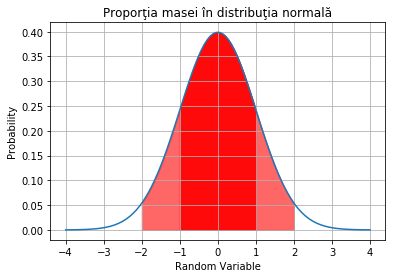

In [48]:
mu = 0
std = 1

x = np.linspace(mu - 4*std, mu + 4*std, 100)
x1 = np.linspace(mu - 2*std, mu + 2*std, 50)
x2 = np.linspace(mu - 1*std, mu + 1*std, 25)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.fill_between(x1, stats.norm.pdf(x1, mu, std), color="red", alpha=0.6)
plt.fill_between(x2, stats.norm.pdf(x2, mu, std), color="red", alpha=0.9)
plt.grid(True)
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.title('Proporţia masei în distribuţia normală')
plt.show()

Pentru distribuţia normală, 95% din aria de sub curbă este între 2 deviaţii standard faţă de medie (toată aria marcată cu roşu de mai sus). Deci în 'cozile' (tails) laterale rămâne restul de 5%. Partea la o deviaţie standard faţă de medie (partea roşie centrală) formează cam 68% din total; iar aria situată la 3 deviaţii standard faţă de medie formează aproximativ 99.5% din total.

Aşadar cam 5% din arie nu este marcată. Prin simetrie, doar 2.5% din date sunt mai mari sau egale cu 2 deviaţii standard faţă de medie. Putem scrie aşadar:

$P(\bar{X} > 2 \sigma/\sqrt{n} \: \text{or} \: \bar{X} < -2 \sigma/\sqrt{n}) = 5\%$

Cantitatea:

$\bar{X} \pm 2 \frac{\sigma}{\sqrt{n}}$ (cuantila 0.975 este de fapt 1.96, dar o aproximăm cu 2)

este denumită intervalul 95% pentru $\mu$. Acest 95% spune că dacă realizăm în mod repetat sample-uri de dimensiune $n$, aproximativ 95% dintre ele vor conţine $\mu$, cantitatea pe care încercăm să o estimăm.

Q21. Dacă urmărim să obţinem intervalul de confidenţă 90%, ce cuantilă folosim?

1. 100
2. 90
3. 95
4. 85

In [27]:
def q():
    return 3

raspuns(21, q)

Raspuns corect


Q22. Folosiţi stats.norm.ppf() pentru a obţine această quantilă:

In [28]:
def q():
    return stats.norm.ppf(.95, 0, scale=1)

raspuns(22, q)

Raspuns corect


Q23. Într-o distribuţie binomială în care $p$ reprezintă probabilitatea de succes, dispersia este $\sigma^2 = p(1-p)$. Eroarea standard a mediei sample-ului $\hat{p}$ este $\sqrt{p(1-p)/n}$, unde $n$ este dimensiunea sample-ului. Intervalul de confidenţă 95% pentru $p$ este $\hat{p} \pm 2 \sqrt{p(1-p)/n}$. 2-ul din formulă reprezintă:

1. eroarea standard a lui $\hat{p}$
2. media lui $\hat{p}$
3. quantila 97.5
4. dispersia lui $\hat{p}$

In [29]:
def q():
    return 3

raspuns(23, q)

Raspuns corect


Q24. De cele mai multe ori, pentru o astfel de distribuţie binomială nu cunoaştem valoarea teoretică a lui $p$. Putem însă să considerăm valoarea lui $p$ pentru care funcţia $p(1-p)$ atinge valoarea maximă. 

a) reprezentaţi grafic funcţia $p(1-p)$ şi observaţi valoarea maximă a lui $p$;

b) pentru $p$ astfel determinat, care este intervalul de confidenţă 95% pentru media populaţiei pentru sample-ul $\{0, 1, 1, 1, 0, 1, 0, 1, 1\}$? Daţi răspunsul sub formă de listă cu 2 elemente.

In [31]:
sample = np.array([0, 1, 1, 1, 0, 1, 0, 1, 1])


def q():
    return [0.3333333333333333, 1.0]

raspuns(24, q)

Raspuns corect


Q25. În urma unui sondaj a reieşit că din 100 de potenţiali alegători, 60 şi-au exprimat intenţia de a-l vota pe candidatul X. Care este intervalul de confidenţă 95% pentru media populaţiei? Nu cunoaştem probabilitatea de succes pentru candidatul X, aşa că luăm intervalul de confidenţă cel mai larg ($p$ maxim). Daţi cele două valori sub formă de listă.

In [32]:
def q():
    return [0.5, 0.7]

raspuns(25, q)

Raspuns corect


Q26. Puteţi afirma că sunteţi 95% sigur(ă) că acel candidat va ieşi câştigător?

1. da
2. nu

In [33]:
def q():
    return 1

raspuns(26, q)

Raspuns corect


Q27. Să fim mai exacţi. Cunoaştem cu aproximaţie media populaţiei (din sample-ul de votanţi), adică 0.6, aşa că putem calcula dispersia teoretică a distribuţiei binomiale. Apoi vom lua, folosind stats.norm.ppf(), exact quantila 95%. Refaceţi calculul pentru intervalul de confidenţă. Răspundeţi cu o listă de 2 elemente, rotunjite la 3 zecimale.

In [34]:
def q():
    return [0.504, 0.696]

raspuns(27, q)

Raspuns corect


Q28. Reluăm exemplul cu pompa nucleară care s-a defectat de 5 ori în decurs de 94.32 zile. Dorim să determinăm intervalul de confidenţă 95% pentru rata de defectare pe zi. Numărul de defectări este variabila aleatoare Poisson X cu parametrul $\lambda * t$. Nu observăm rata de defectare, dar o estimăm ca $x / t$. Fie deci acest estimator $\hat{\lambda} = x/t$. Conform teoriei, estimatorul dispersiei ratei failure-urilor este $\lambda/t$. Pentru că nu ştim $\lambda$, folosim estimatorul, aşa încât aproximăm dispersia cu $\hat{\sigma^2} = \hat{\lambda}/t$.

Aşadar, calculăm intervalul de confidenţă astfel:

$\hat{\lambda} \pm z_{97.5\%} \sqrt{\hat{\sigma}^2}$

Daţi intervalul de confidenţă ca o listă cu 2 elemente (4 zecimale exacte).

In [35]:
def q():
    return [0.0065, 0.0995]

raspuns(28, q)

Raspuns corect


Q29. Teorema centrală de limită ne spune că distribuţia mediilor este o distribuţie:

1. Poisson
2. normală
3. anormală
4. binomială
5. standard

In [36]:
def q():
    return 2

raspuns(29, q)

Raspuns corect


Q30. CLT ne spune că mediile au acea distribuţie centrată la:

1. standard error
2. media populaţiei
3. dispersia populaţiei

In [37]:
def q():
    return 2

raspuns(30, q)

Raspuns corect


Q31. CLT ne spune că mediile au acea distribuţie cu deviaţia standard egală cu:

1. dispersia populaţiei
2. media populaţiei
3. standard error

In [38]:
def q():
    return 3

raspuns(31, q)

Raspuns corect


Q32. CLT ne spune că mediile au întotdeauna o distribuţie normală indiferent de mărimea sample-ului:

1. Adevărat
2. Fals

In [39]:
def q():
    return 2

raspuns(32, q)

Raspuns corect


Q33. Pentru a calcula intervalul de confidenţă pentru medie, se ia sample mean şi se adună şi se scade quantila normală relevantă înmulţit cu:

1. dispersia / n
2. media
3. standard error
4. dispersia

In [40]:
def q():
    return 3

raspuns(33, q)

Raspuns corect


Q34. Dacă avem mai puţină variabilitate în date, atunci intervalul de confidenţă:

1. se măreşte
2. se micşorează

In [41]:
def q():
    return 2

raspuns(34, q)

Raspuns corect


Q35. Dacă mărimea sample-ului pe care calculăm mediile creşte, atunci intervalul de confidenţă:

1. se măreşte
2. se micşorează

In [42]:
def q():
    return 2

raspuns(35, q)

Raspuns corect


Q36. O setare rapidă pe care o putem face pentru un sample size mic în cazul unei distribuţii binomiale este să:
    
1. schimbăm datele
2. adăugăm 2 succese şi să scădem 2 failures
3. adăugăm 2 succese şi 4 failures
4. adăugăm 2 succese şi 2 failures

In [45]:
def q():
    return 4

raspuns(36, q)

Raspuns corect
